In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import seaborn as sns
import re

BASE_DIR = "./"

def average_by_epoch(df_list, x, y):
    epochs = [tuple(df['epoch'].tolist()) for df in df_list]
    assert len(set(epochs)) == 1
    xs = [df[x].tolist() for df in df_list]
    ys = [df[y].tolist() for df in df_list]

    xs = pd.DataFrame(xs).T.mean(axis=1).tolist()
    ys = pd.DataFrame(ys).T.mean(axis=1).tolist()

    df = pd.DataFrame(zip(xs, ys), columns=[x, y])

    return df

def read_adjusted_ppl():
    def concate(path):
        dfs = []
        paths = glob(path)
        for p in paths:
            p = pd.read_csv(p)
            dfs.append(p)
        df = pd.concat(dfs)
        return df
    df_valid = concate("../data/adjusted_metrics/valid_*.csv")
    df_test = concate("../data/adjusted_metrics/test_*.csv")
    df_valid = df_valid.drop_duplicates()
    df_test = df_test.drop_duplicates()
    return df_valid, df_test


def join_adjusted_ppl(path):
    df = pd.read_csv(p)
    df1 = pd.merge(df, DF_V, on='model_path')
    # print(df1.shape[0], df.shape[0])
    assert df1.shape[0] == df.shape[0]
    return df1


DF_V, DF_T = read_adjusted_ppl()

COLORS = ['black', 'mediumseagreen', 'darkorange', 'gray']
MARKERS = ['.', '+', '^', '1', 'x', '*', 'd']
AVERAGE = True
LABELS = ['No-DP', 'DPSGD,    $\sigma$=0.5, C=0.1', 'S-DPSGD, $\sigma$=0.5,  C=1e-3', 'DPSGD,    $\sigma$=0.25, C=0.1']
LABELS2 = ['No-DP', 'DPSGD,    $\sigma$=0.6, C=0.01', 'S-DPSGD, $\sigma$=0.7, C=5e-3']

In [2]:

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
title_fontsize = 20
label_font_size = 20
legend_fontsize = 13

dot_size=60
alpha = 0.7

In [28]:
df_nodp

,overall_ppl,canary_exposure
0,50038.102839,2.088594
1,481.119351,0.384992
2,350.843484,0.565943
3,264.253204,2.884358
4,236.035291,5.684202
...,...,...
67,68.832343,19.931569
68,68.832343,19.931569
69,68.832343,19.931569
70,68.832343,19.931569


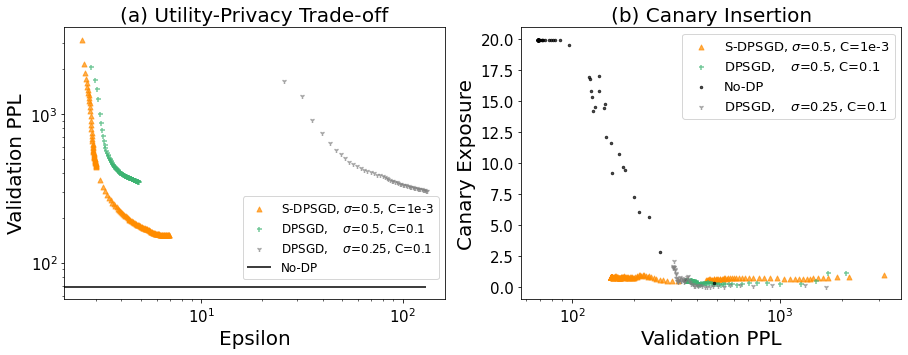

In [44]:
#nodp


##########################################################
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)
df_dp_small = pd.read_csv("/home/wyshi/privacy/attacks/canary_insertion/old_data/dp_sigma025_lr01_norm01_with_privacy.csv")

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)



x_var = 'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig, (ax3, ax1) = plt.subplots(1, 2, figsize=(15,5))


plot_func1 = ax1.scatter
# plot_func2 = ax2.scatter
plot_func3 = ax3.scatter

# average
if AVERAGE:
    x_var1 = 'overall_ppl'
    metrics1 = 'canary_exposure'
    
    x_var3 = 'model_epsilon'#'epoch'
    metrics3 = 'overall_ppl'
    
    df_nodps1 = [average_by_epoch(df_nodps, x_var1, metrics1)]
    df_dps1 = [average_by_epoch(df_dps, x_var1, metrics1)]
    df_partialdps1 = [average_by_epoch(df_partialdps, x_var1, metrics1)]

    df_nodps3 = [average_by_epoch(df_nodps, x_var3, metrics3)]
    df_dps3 = [average_by_epoch(df_dps, x_var3, metrics3)]
    df_partialdps3 = [average_by_epoch(df_partialdps, x_var3, metrics3)]



for i, df_partialdp in enumerate(df_partialdps3):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func3(df_partialdp[x_var3].tolist()[1:], df_partialdp[metrics3].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=LABELS[2], marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps3):
    plot_func3(df_dp[x_var3].tolist()[1:], df_dp[metrics3].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label=LABELS[1], marker=MARKERS[1])
ax3.scatter(df_dp_small['epsilon'].tolist()[1:], df_dp_small['model_ppl'].tolist()[1:], color=COLORS[3], s=dot_size, alpha=alpha, label=LABELS[3], marker=MARKERS[3])


# for i, df_nodp in enumerate(df_nodps3):
#     plot_func3(df_nodp[x_var3].tolist()[1:], df_nodp[metrics3].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label=LABELS[0], marker=MARKERS[0])


# plt.hlines(0.5, xmin=0, xmax=2000)
ax3.set_title('(a) Privacy-Utility Trade-off', fontsize=title_fontsize)
ax3.hlines(y=68.832343, xmin=0, xmax=130, label=LABELS[0], color=COLORS[0], )

ax3.legend(loc="upper right", prop={'size':legend_fontsize-1}, bbox_to_anchor=(1, 0.4))
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('Epsilon', fontsize=label_font_size)
ax3.set_ylabel('Validation PPL', fontsize=label_font_size)

#####################################################################################
for i, df_partialdp in enumerate(df_partialdps1):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func1(df_partialdp[x_var1].tolist()[1:], df_partialdp[metrics1].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=LABELS[2], marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps1):
    plot_func1(df_dp[x_var1].tolist()[1:], df_dp[metrics1].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label=LABELS[1], marker=MARKERS[1])

ax1.scatter(df_dp_small['model_ppl'].tolist()[1:], df_dp_small['canary_exposure'].tolist()[1:], color=COLORS[3], s=dot_size, alpha=alpha, label=LABELS[3], marker=MARKERS[3])

for i, df_nodp in enumerate(df_nodps1):
    plot_func1(df_nodp[x_var1].tolist()[1:], df_nodp[metrics1].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label=LABELS[0], marker=MARKERS[0])


# plt.hlines(0.5, xmin=0, xmax=2000)
ax1.set_title('(b) Canary Insertion', fontsize=title_fontsize)

ax1.legend(loc="upper right", prop={'size':legend_fontsize})
ax1.set_xscale('log')
ax1.set_xlabel('Validation PPL', fontsize=label_font_size)
ax1.set_ylabel('Canary Exposure', fontsize=label_font_size)

####################################################################################
# membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)



x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4





# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]

# for i, df_partialdp in enumerate(df_partialdps):
#     # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
#     # label = "s-dp"
#     # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
#     # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
#     scatters = plot_func2(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=LABELS[2], marker=MARKERS[2])
#     # scatters.set_color(cm(i//3*3.0/NUM_COLORS))




# for i, df_dp in enumerate(df_dps):
#     plot_func2(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label=LABELS[1], marker=MARKERS[1])

# for i, df_nodp in enumerate(df_nodps):
#     plot_func2(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label=LABELS[0], marker=MARKERS[0])

# ax2.hlines(0.5, xmin=0, xmax=4000, label='Random Guess')


# ax2.set_title('(c) Membership Inference', fontsize=title_fontsize)
# ax2.legend(loc="upper right", prop={'size':legend_fontsize+0.5})
# ax2.set_xscale('log')
# ax2.set_xlabel('Validation PPL', fontsize=label_font_size)
# ax2.set_ylabel('Inference Acc', fontsize=label_font_size)


# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.tick_params(axis='both', which='minor', labelsize=20)
# ax.set_xticklabels(x_ticks, rotation=90, fontsize=20)
# plt.xticks(fontsize=25, rotation=90)
plt.show()





In [46]:
df_nodp

,overall_ppl,canary_exposure
0,50313.778991,1.589729
1,416.153794,0.619197
2,314.177537,0.667560
3,269.550225,0.654397
4,312.388419,0.648886
...,...,...
96,3.056852,19.931569
97,3.056852,19.931569
98,3.056852,19.931569
99,3.056852,19.931569


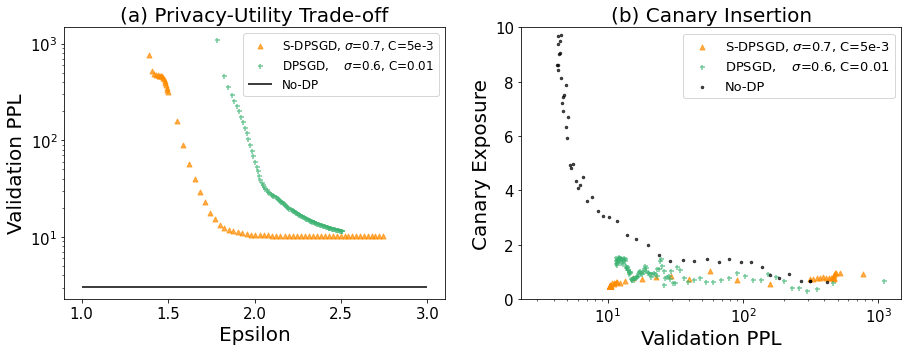

In [51]:
#nodp
# title_fontsize = 20
# label_font_size = 20
# legend_fontsize = 15

#############################
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", 
# "bs32", "lr0.5_bs4", 
"lr2_bs4", 
"*.csv"
)):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)

#############################


x_var = 'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig, (ax3, ax1) = plt.subplots(1, 2, figsize=(15,5))


plot_func1 = ax1.scatter
# plot_func2 = ax2.scatter
plot_func3 = ax3.scatter

# average
if AVERAGE:
    x_var1 = 'overall_ppl'
    metrics1 = 'canary_exposure'
    
    x_var3 = 'model_epsilon'
    metrics3 = 'overall_ppl'
    
    df_nodps1 = [average_by_epoch(df_nodps, x_var1, metrics1)]
    df_dps1 = [average_by_epoch(df_dps, x_var1, metrics1)]
    df_partialdps1 = [average_by_epoch(df_partialdps, x_var1, metrics1)]

    df_nodps3 = [average_by_epoch(df_nodps, x_var3, metrics3)]
    df_dps3 = [average_by_epoch(df_dps, x_var3, metrics3)]
    df_partialdps3 = [average_by_epoch(df_partialdps, x_var3, metrics3)]



for i, df_partialdp in enumerate(df_partialdps3):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func3(df_partialdp[x_var3].tolist()[1:], df_partialdp[metrics3].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=LABELS2[2], marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps3):
    plot_func3(df_dp[x_var3].tolist()[1:], df_dp[metrics3].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label=LABELS2[1], marker=MARKERS[1])


# for i, df_nodp in enumerate(df_nodps3):
#     plot_func3(df_nodp[x_var3].tolist()[1:], df_nodp[metrics3].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label=LABELS2[0], marker=MARKERS[0])


# plt.hlines(0.5, xmin=0, xmax=2000)
ax3.set_title('(a) Privacy-Utility Trade-off', fontsize=title_fontsize)
ax3.hlines(y=3.056852, xmin=1, xmax=3, label=LABELS2[0], color=COLORS[0], )

ax3.legend(loc="upper right", prop={'size':legend_fontsize-1})
ax3.set_yscale('log')
# ax3.set_xscale('log')
ax3.set_xlabel('Epsilon', fontsize=label_font_size)
ax3.set_ylabel('Validation PPL', fontsize=label_font_size)

#####################################################################################
for i, df_partialdp in enumerate(df_partialdps1):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func1(df_partialdp[x_var1].tolist()[1:], df_partialdp[metrics1].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=LABELS2[2], marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps1):
    plot_func1(df_dp[x_var1].tolist()[1:], df_dp[metrics1].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label=LABELS2[1], marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps1):
    plot_func1(df_nodp[x_var1].tolist()[1:], df_nodp[metrics1].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label=LABELS2[0], marker=MARKERS[0])


# plt.hlines(0.5, xmin=0, xmax=2000)
ax1.set_title('(b) Canary Insertion', fontsize=title_fontsize)

ax1.legend(loc="upper right", prop={'size':legend_fontsize})
ax1.set_xscale('log')
ax1.set_ylim(0,10)  # most of the data

ax1.set_xlabel('Validation PPL', fontsize=label_font_size)
ax1.set_ylabel('Canary Exposure', fontsize=label_font_size)

####################################################################################
# membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", 
# "final_fix_firstname_picked_without_ground_truth_help", 
"final_fix_firstname_picked_nodp_lr2_bs4_without_ground_truth_help", 
"*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", 
"final_fix_firstname_picked_without_ground_truth_help", 

"*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", 

"final_fix_firstname_picked_without_ground_truth_help", 

"*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))


dot_size=25
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4





# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]





# for i, df_partialdp in enumerate(df_partialdps):
#     # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
#     label = "s-dp"
#     # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
#     # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
#     scatters = plot_func2(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=LABELS2[2], marker=MARKERS[2])
#     # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


# for i, df_dp in enumerate(df_dps):
#     plot_func2(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label=LABELS2[1], marker=MARKERS[1])


# for i, df_nodp in enumerate(df_nodps):
#     plot_func2(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label=LABELS2[0], marker=MARKERS[0])

# ax2.hlines(0.5, xmin=0, xmax=4000, label='Random Guess')


# ax2.set_title('(c) Membership Inference', fontsize=title_fontsize)
# ax2.legend(loc="upper right", prop={'size':legend_fontsize+0.5})
# ax2.set_xscale('log')
# ax2.set_ylim(0.45,1)  # most of the data
# ax2.set_xlabel('Validation PPL', fontsize=label_font_size)
# ax2.set_ylabel('Inference Acc', fontsize=label_font_size)

plt.show()





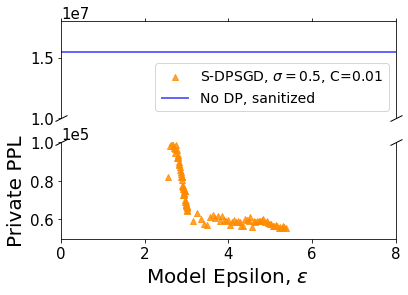

In [89]:
from matplotlib import colors as mcolors



#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_nomiss", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
# df_dps = []
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
#     df_dps.append(join_adjusted_ppl(p))
# # df_dps = pd.concat(df_dps)

#partial dp
#
# /home/wyshi/privacy/attacks/canary_insertion/partialdp/param_search/lr0.1_sigma0.01_norm0.005_seed1111.csv
df_partialdps = []
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.01_norm0.005_seed1111.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.1_norm0.005_seed1111.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.45_norm0.005_seed1111.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "lr0.1_sigma0.5_norm0.001_seed1111.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion, "partialdp", "param_search", "*.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.1_norm0.25_seed1111.csv")):
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.5_norm0.01_seed1111.csv")):
    if True:#"sigma0.01" not in p:
        df = join_adjusted_ppl(p)
        df_partialdps.append(df)



dot_size=1
alpha = 0.8
x_var = 'model_epsilon'
metrics = 'private_ppl'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'




# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    # df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    # df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]





fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.25)  # adjust space between axes


plot_func = ax1.scatter
plot_func2 = ax2.scatter




# for i, df_dp in enumerate(df_dps):
#     plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], #s=dot_size, 
#     alpha=alpha, label='full dp', marker=MARKERS[1])



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "S-DPSGD, $\sigma=0.5$, C=0.01"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    scatters = plot_func2(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


# plot the same data on both axes
for i, df_nodp in enumerate(df_nodps):
    ax1.hlines(df_nodp[metrics].tolist()[-1:], xmin=0, xmax=8, color=COLORS[3], alpha=alpha, label='No DP, sanitized')
    ax2.hlines(df_nodp[metrics].tolist()[-1:], xmin=0, xmax=8, color=COLORS[3], alpha=alpha, label='No DP, sanitized')
    # plot_func(df_nodp[x_var].tolist()[-1:], df_nodp[metrics].tolist()[-1:], color=COLORS[0], #s=dot_size, 
    # alpha=alpha, label='no dp', marker=MARKERS[0])



# zoom-in / limit the view to different portions of the data
ax1.set_ylim(10000_000,18000_000)  # outliers only
ax2.set_ylim(50000,100_000)  # most of the data

ax1.set_xlim(0,8)  # outliers only
ax2.set_xlim(0,8)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()









# plt.hlines(0.5, xmin=0, xmax=2000)
ax1.legend(loc="lower right", prop={'size':legend_fontsize+1})
# plt.yscale('log')
plt.xlabel('Model Epsilon, $\epsilon$ ', fontsize=label_font_size)
ax2.set_ylabel('Private PPL', fontsize=label_font_size)

ax1.ticklabel_format(style='sci')
ax2.ticklabel_format(style='sci')

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()

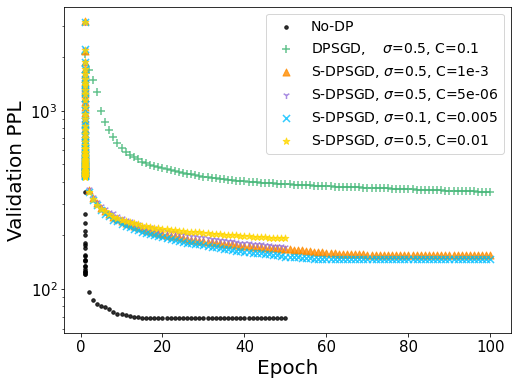

In [90]:
from matplotlib import colors as mcolors
dot_size=50

# LABELS = ['No-DP', 'DPSGD, $\sigma$=0.5, C=0.1', 'S-DPSGD, $\sigma$=0.5, C=1e-3']

default_colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())[8:]

default_colors = ['mediumpurple',
 'deepskyblue',
 'gold',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet']

#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)



x_var = 'epoch'
metrics = 'overall_ppl'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, 
    alpha=alpha, label=LABELS[0], marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, 
    alpha=alpha, label=LABELS[1], marker=MARKERS[1])



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, 
    alpha=alpha, label=LABELS[2], marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


# for other parameters
#partial dp
df_partialdps_params = []
for p in glob(os.path.join(BASE_DIR, "membership_inference/partialdp/final_fix/param_search", "*.csv")):
    try:
        if ("sigma0.1_norm0.005_seed1111_100epochs" in p) or ("sigma0.5_norm0.01" in p) or ("sigma0.5_norm5e-06" in p):
            df_partialdps_params.append(join_adjusted_ppl(p))
    except:
        print(p)
# df_partialdps = pd.concat(df_partialdps)


for i, df_partialdp_param in enumerate(df_partialdps_params):
    matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp_param.iloc[-1]['model_path'])
    lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    # label = "s-dp"
    # label = f"S-DPSGD, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp_param.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp_param.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp_param.iloc[-1]['model_alpha']}"
    label = f"S-DPSGD, $\sigma$={sigma}, C={C}"
    scatters = plot_func(df_partialdp_param[x_var].tolist()[1:], df_partialdp_param[metrics].tolist()[1:], color=default_colors[i], s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[i+3])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))



# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':legend_fontsize+1})
plt.yscale('log')
plt.xlabel('Epoch', fontsize=label_font_size)
plt.ylabel('Validation PPL', fontsize=label_font_size)
plt.show()

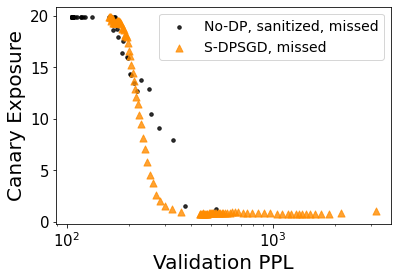

In [91]:
# missed experiments
#nodp normalized

df_nodps_normalized = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized", "*")):
    df_nodps_normalized.append(join_adjusted_ppl(p))

#partial dp missed
df_partialdps_missed = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed", "*")):
    df_partialdps_missed.append(join_adjusted_ppl(p))





# missed
# dot_size=20
# alpha = 0.5
# x_var, y_var = "canary_ppl", "canary_exposure"
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if True:
    # df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_nodps_normalized = [average_by_epoch(df_nodps_normalized, x_var, y_var)]
    df_partialdps_missed = [average_by_epoch(df_partialdps_missed, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter


# for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
#     plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')


for i, df_nodp_normalized in enumerate(df_nodps_normalized):
    plot_func(df_nodp_normalized[x_var].tolist()[1:], df_nodp_normalized[y_var].tolist()[1:], color=COLORS[0], marker=MARKERS[0], s=dot_size, alpha=alpha, label='No-DP, sanitized, missed')




for i, df_partialdp in enumerate(df_partialdps_missed):
    df_partialdp = df_partialdp.iloc[:100]
    label = "S-DPSGD, missed"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[y_var].tolist()[1:], color=COLORS[2], marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)
        # scatters.set_color(cm(i//1*1.0/NUM_COLORS))





# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="upper right", prop={'size':legend_fontsize+1})
plt.xscale('log')
plt.xlabel('Validation PPL', fontsize=label_font_size)
plt.ylabel('Canary Exposure', fontsize=label_font_size)
plt.show()

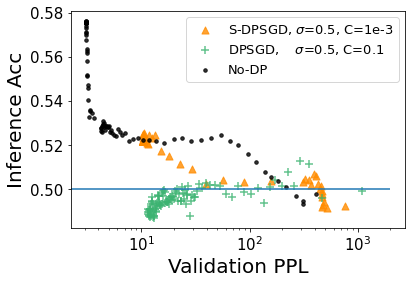

In [92]:
# dialog, membership inference, first name, twice attack, without ground truth help
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", 
# "final_fix_firstname_picked_without_ground_truth_help", 
"final_fix_firstname", 
"lr2_bs4",
"*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", 
"final_fix_firstname", 

"*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", 

"final_fix_firstname", 

"*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


# dot_size=20
# alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

plt.hlines(0.5, xmin=0, xmax=2000)

# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=LABELS[2], marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))




for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label=LABELS[1], marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label=LABELS[0], marker=MARKERS[0])


plt.legend(loc="upper right", prop={'size':legend_fontsize})
plt.xscale('log')
plt.xlabel('Validation PPL', fontsize=label_font_size)
plt.ylabel('Inference Acc', fontsize=label_font_size)
plt.show()